In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/Electric_Production.csv')

In [3]:
data

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [4]:
import numpy as np

Date

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

In [6]:
target_variable = 'IPG2211A2N'

In [7]:
import matplotlib.pyplot as plt

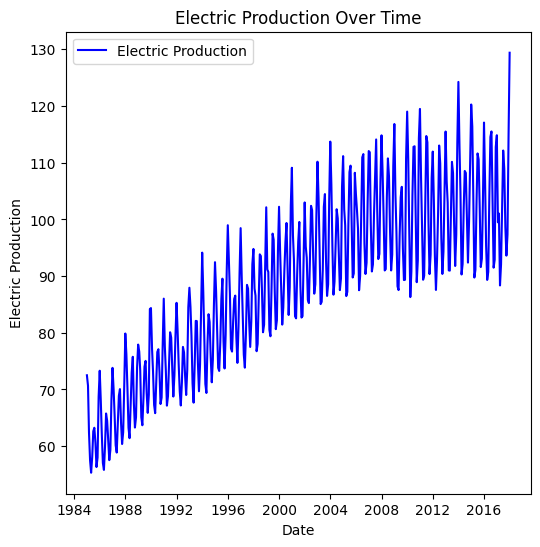

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(data.index, data['IPG2211A2N'], label='Electric Production', color='blue')
plt.title('Electric Production Over Time')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.show()

Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

Data Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data[[target_variable]])
test_data_scaled = scaler.transform(test_data[[target_variable]])

Sequence

In [13]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:(i + sequence_length)]
        target = data[i + sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [14]:
sequence_length = 20

In [15]:
X_train, y_train = create_sequences(train_data_scaled, sequence_length)

In [16]:
X_test, y_test = create_sequences(test_data_scaled, sequence_length)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [18]:
rnn= Sequential()
rnn.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, 1)))
rnn.add(Dense(units=1))
rnn.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
rnn.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
10/10 [==============================] - 1s 4ms/step - loss: 0.0648
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0200
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0059
Epoch 8/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 9/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 11/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 12/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 13/50
10/10 [==============================

Validation

In [20]:
train_predictions = rnn.predict(X_train)

10/10 [==============================] - 0s 2ms/step


In [21]:
test_predictions = rnn.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [22]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

Evaluation

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 2.332850829602108
Testing RMSE: 3.9074777572652786


In [25]:
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
print(f'Training MAE: {train_mae}')
print(f'Testing MAE: {test_mae}')


Training MAE: 1.7937243047129827
Testing MAE: 2.8203460426839198


In [26]:
print(f'Training MAE: {train_mae}')
print(f'Testing MAE: {test_mae}')
print(f'Training MSE: {mean_squared_error(y_train, train_predictions)}')
print(f'Testing MSE: {mean_squared_error(y_test, test_predictions)}')
print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')
print(f'Training R2 Score: {r2_score(y_train, train_predictions)}')
print(f'Testing R2 Score: {r2_score(y_test, test_predictions)}')

Training MAE: 1.7937243047129827
Testing MAE: 2.8203460426839198
Training MSE: 5.442192993175243
Testing MSE: 15.26838242352289
Training RMSE: 2.332850829602108
Testing RMSE: 3.9074777572652786
Training R2 Score: 0.9708991723917593
Testing R2 Score: 0.8393234217147544


Visualization

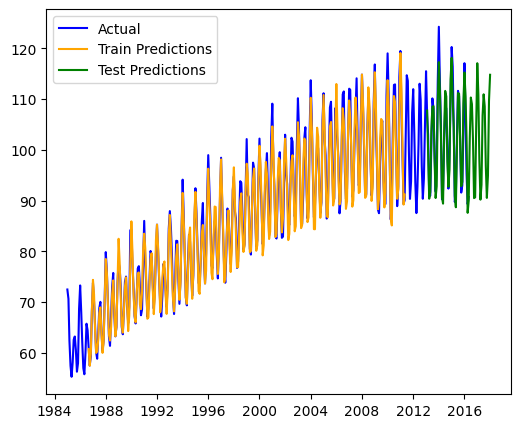

In [27]:
plt.figure(figsize=(6, 5))
plt.plot(data.index[:-sequence_length], data[target_variable].iloc[:-sequence_length], label='Actual', color='blue')
train_index = data.index[sequence_length:sequence_length+len(train_predictions)]
plt.plot(train_index, train_predictions, label='Train Predictions', color='orange')
test_index = data.index[-len(test_predictions):]
plt.plot(test_index, test_predictions, label='Test Predictions', color='green')
plt.legend()
plt.show()

Prediction

In [28]:
future_sequence = test_data_scaled[-sequence_length:]
future_sequence = future_sequence.reshape((1, sequence_length, 1))
future_predictions = []
for _ in range(50):
    future_prediction = rnn.predict(future_sequence)
    future_predictions.append(future_prediction[0, 0])
    future_sequence = np.concatenate([future_sequence[:, 1:, :],
                                      future_prediction.reshape((1, 1, 1))], axis=1)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 [==============================] - 0s 23ms/step


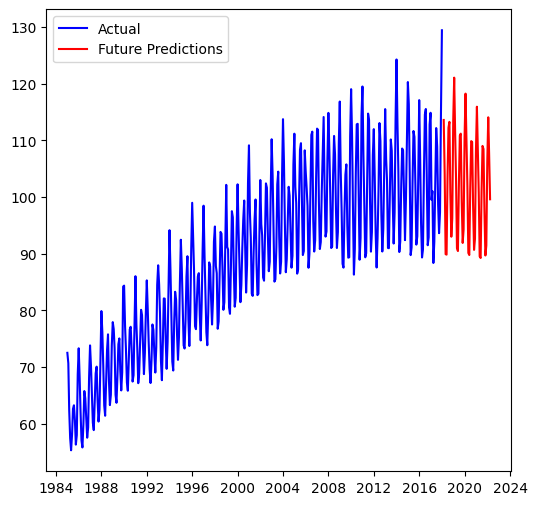

In [29]:
plt.figure(figsize=(6, 6))
plt.plot(data.index, data[target_variable], label='Actual', color='blue')
plt.plot(pd.date_range(test_data.index[-1], periods=len(future_predictions) + 1,
                       freq='M')[1:], future_predictions, label='Future Predictions', color='red')
plt.legend()
plt.show()